<a href="https://colab.research.google.com/github/JuliMillan/Diversidad_rol/blob/main/Copia_de_Diversidad_rol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import string
import matplotlib.patches as mpatches
from scipy import stats
sns.set_style('dark')

###Correr si no tenés montado GDrive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Funciones útiles

In [3]:
def normalidad(datos, alfa):

  k2, p = stats.normaltest(edades, nan_policy='omit')

  print("p = {:g}".format(p))
  if p < alpha:  # Hipótesis nula: la distribución proviene de una distribución Guassiana
    print("La distribución no es normal")
  else:
    print("La distribución parece normal")



def pie_plot(datos, explode, titulo):
  d = datos.value_counts()
  pie, ax = plt.subplots(figsize=[10,6])
  labels=d.keys()
  plt.pie(x=d, autopct='%.1f%%', 
          explode=explode, labels=labels, 
          pctdistance=0.5, startangle=90,
          colors = sns.color_palette("Set2"))
  ax.axis('equal')
  plt.title('{}'.format(titulo), fontsize=14)
  return plt.show()

##Exploramos los datos

In [4]:
archivo = "/content/drive/MyDrive/Copia de Diversidad sexual y de género en el mundo de los juegos de rol (respuestas) - Respuestas de formulario 1.csv"
df = pd.read_csv(archivo)
df.head(3)

,Marca temporal,Qué edad tenés?,Qué juego/s jugás?,Participás como,Con qué género te identificás?,"En relación al género que se te asignó al nacer, te considerás",Cuál es tu orientación sexual?,Alguna vez sufriste discriminación (como jugadorx) por tu género u orientación sexual durante una partida?,Presenciaste algún tipo de discriminación hacia otra persona?,"En caso de haber sufrido/presenciado casos de discriminación, reaccionaste de alguna manera?",Tus grupos de juego normalmente están conformados por,En qué país naciste?,En qué país vivís?,"Algo que quieras agregar, contar, comentar, criticar?"
0,16/06/2021 22:13:54,29.0,Dungeons & Dragons 5E,Jugador,Mujer,Cis,Heterosexual,No estoy segurx,No estoy segurx,Sí,Mayoría de varones,Argentina,Argentina,NaN
1,17/06/2021 10:11:50,29.0,Dungeons & Dragons 5E,Jugadorx,Mujer,Cis,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina,NaN
2,17/06/2021 10:25:49,32.0,"Dungeons & Dragons 5E, Dungeons & Dragons 3.5",Ambos,Varón,Cis,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 14 columns):
 #   Column                                                                                                       Non-Null Count  Dtype  
---  ------                                                                                                       --------------  -----  
 0   Marca temporal                                                                                               146 non-null    object 
 1   Qué edad tenés?                                                                                              139 non-null    float64
 2   Qué juego/s jugás?                                                                                           145 non-null    object 
 3   Participás como                                                                                              145 non-null    object 
 4   Con qué género te identificás?                                

In [6]:
df.columns = [
              'fecha', 'edad', 'juegos', 'rol', 'genero', 'cistrans', 'sexualidad', 
              'discriminacion_personal', 'disciminacion_otre', 'reaccion',
              'grupo', 'nacimiento', 'residencia', 'comentario'
              ]

df.head(3)

,fecha,edad,juegos,rol,genero,cistrans,sexualidad,discriminacion_personal,disciminacion_otre,reaccion,grupo,nacimiento,residencia,comentario
0,16/06/2021 22:13:54,29.0,Dungeons & Dragons 5E,Jugador,Mujer,Cis,Heterosexual,No estoy segurx,No estoy segurx,Sí,Mayoría de varones,Argentina,Argentina,NaN
1,17/06/2021 10:11:50,29.0,Dungeons & Dragons 5E,Jugadorx,Mujer,Cis,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina,NaN
2,17/06/2021 10:25:49,32.0,"Dungeons & Dragons 5E, Dungeons & Dragons 3.5",Ambos,Varón,Cis,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina,NaN


In [7]:
df1 = df.iloc[:,1:13]
df1.head(3)

,edad,juegos,rol,genero,cistrans,sexualidad,discriminacion_personal,disciminacion_otre,reaccion,grupo,nacimiento,residencia
0,29.0,Dungeons & Dragons 5E,Jugador,Mujer,Cis,Heterosexual,No estoy segurx,No estoy segurx,Sí,Mayoría de varones,Argentina,Argentina
1,29.0,Dungeons & Dragons 5E,Jugadorx,Mujer,Cis,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina
2,32.0,"Dungeons & Dragons 5E, Dungeons & Dragons 3.5",Ambos,Varón,Cis,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina


##Edades y género

In [8]:
edades = (df1['edad'])
#print(edades)
print(edades.shape)
#print(type(edades))
print(edades.describe())
edades_np = edades.dropna()
edades_np = edades_np.to_numpy()
#print(type(edades_np))
print(edades_np.mean())


(146,)
count    139.000000
mean      30.366906
std        6.739612
min       16.000000
25%       26.000000
50%       30.000000
75%       35.000000
max       51.000000
Name: edad, dtype: float64
30.366906474820144


In [9]:
mediana = (edades.median())
print('La edad más representada es {} años, con {} personas.'.format(int(mediana), len(edades)))

La edad más representada es 30 años, con 146 personas.


In [10]:
edad_maxima = int(edades.max())
edad_minima = int(edades.min())
print('Edad máxima: ', edad_maxima ,'\nEdad mínima: ', edad_minima)

Edad máxima:  51 
Edad mínima:  16


In [11]:
alpha = 1e-3

normalidad(edades_np, alpha)

p = 0.105404
La distribución parece normal


In [12]:
edades_genero = df1[['edad', 'genero']]
edades_genero.head(3)

,edad,genero
0,29.0,Mujer
1,29.0,Mujer
2,32.0,Varón


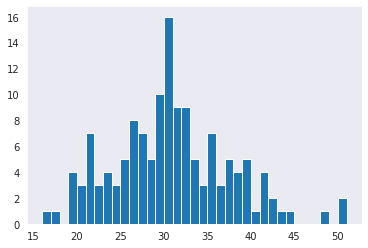

In [13]:
plt.hist(edades, bins=(edad_maxima-edad_minima))
plt.show()

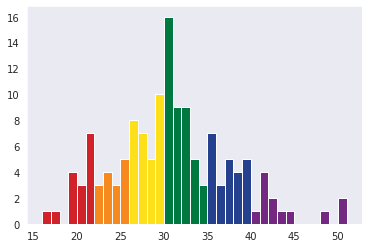

In [14]:
fig, ax = plt.subplots()
bin=(edad_maxima-edad_minima)

N, bins, patches = ax.hist(edades, bins=bin)

for i in range(0,6):
    patches[i].set_facecolor('#D12229')
for i in range(6,10):    
    patches[i].set_facecolor('#F68A1E')
for i in range(10,14):
    patches[i].set_facecolor('#FDE01A')
for i in range(14,19):
    patches[i].set_facecolor('#007940')
for i in range(19,24):    
    patches[i].set_facecolor('#24408E')
for i in range(24, len(patches)):
    patches[i].set_facecolor('#732982')

plt.show()

In [15]:
edades_m = edades_genero[edades_genero['genero']=='Mujer'].dropna()
#edades_m

In [16]:
edades_v = edades_genero[edades_genero['genero']=='Varón'].dropna()
#edades_v

In [17]:
#M = edades_genero[edades_genero['genero']=='Mujer'].dropna()
#M['genero'] = 'M'
#V = edades_genero[edades_genero['genero']=='Varón'].dropna()
#V['genero'] = 'V'

In [18]:
#edades_nb = edades_genero[edades_genero["genero"].str.contains('Varón|Mujer') == False].dropna()
#edades_nb = edades_nb.drop([44])
#edades_nb

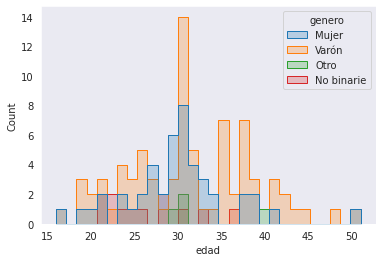

In [19]:
sns.histplot(data=edades_genero, x="edad", hue="genero", element='step', bins=30)
plt.show()

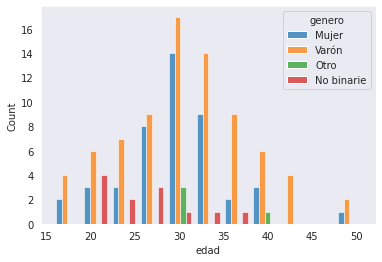

In [20]:
sns.histplot(data=edades_genero, x="edad", hue="genero", multiple="dodge", shrink=.8)
plt.show()

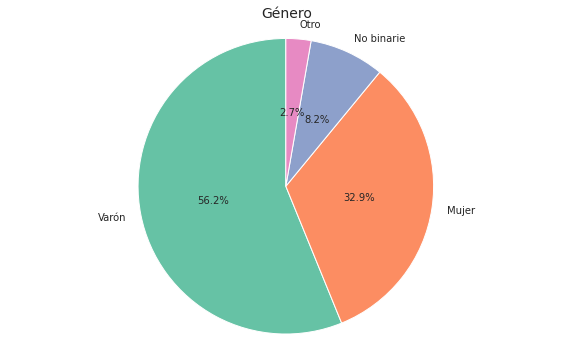

In [21]:
pie_plot(df1['genero'], np.zeros(4), 'Género')
#df1.genero.str.get_dummies().sum().plot.pie(label='Genre', autopct='%1.0f%%')

In [22]:
bins=np.arange(15,50)
#fig, ax = plt.subplots()
#ax.hist(edades_genero.edad, bins=bins)
#ax.hist(edades_v.edad, bins=bins, label='Varones')
#ax.hist(edades_m.edad, bins=bins, label='Mujeres')
#ax.hist(edades_nb.edad, bins=bins, label='No binarie')

#plt.legend()
#plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


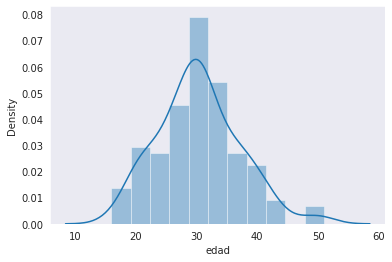

In [23]:
sns.distplot(edades_genero['edad'])
#sns.kdeplot(edades_m['edad'])
#sns.kdeplot(edades_v['edad'])
plt.show()

In [24]:
#edades_nb = edades_nb.drop([12, 44])
#edades_nb

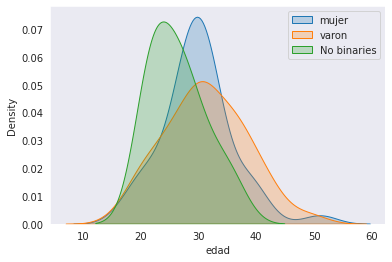

In [25]:
sns.kdeplot(edades_genero[edades_genero.genero =='Mujer'].edad,
             shade=True, label='mujer')
sns.kdeplot(edades_genero[edades_genero.genero=='Varón'].edad,
             shade=True, label='varon')
sns.kdeplot(edades_genero[edades_genero.genero=='No binarie'].edad,
             shade=True, label='No binaries')
#sns.kdeplot(edades_genero[edades_genero.genero=='Otro'].edad,
#             shade=True, label='Otro')
plt.legend()
plt.show()

##Juegos

In [26]:
type(df['juegos'])

pandas.core.series.Series

In [27]:
juegos1 = df['juegos'].dropna()
type(juegos1)

pandas.core.series.Series

In [28]:
juegos = [j.split(';') for j in juegos1]
flat_list = [item for sublist in juegos for item in sublist]
juegos_ = [i.split(', ') for i in flat_list]
otra_vez = [item for sublist in juegos_ for item in sublist]
print(len(otra_vez))

363


In [29]:
contador = Counter(otra_vez)
mas_comunes = contador.most_common(11)
juegos_mas_comunes = pd.DataFrame(mas_comunes)
juegos_mas_comunes
print(mas_comunes)

[('Dungeons & Dragons 5E', 93), ('La Llamada de Cthulhu', 40), ('Vampiros', 35), ('Pathfinder', 33), ('Dungeons & Dragons 3.5', 32), ('Hombre Lobo', 9), ('GURPS', 9), ('PbtA', 8), ('Warhammer', 5), ('Indies', 5), ('Homebrew', 4)]


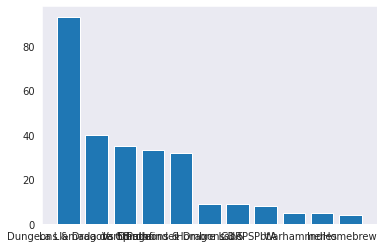

In [30]:
labels = [item[0] for item in mas_comunes]
cantidad = [item[1] for item in mas_comunes]
nbars = len(mas_comunes)

plt.bar(np.arange(nbars), cantidad, tick_label=labels)
plt.show()

In [31]:
datos = pd.DataFrame(mas_comunes)
datos.columns=['juego', 'cantidad']
datos

,juego,cantidad
0,Dungeons & Dragons 5E,93
1,La Llamada de Cthulhu,40
2,Vampiros,35
3,Pathfinder,33
4,Dungeons & Dragons 3.5,32
5,Hombre Lobo,9
6,GURPS,9
7,PbtA,8
8,Warhammer,5
9,Indies,5


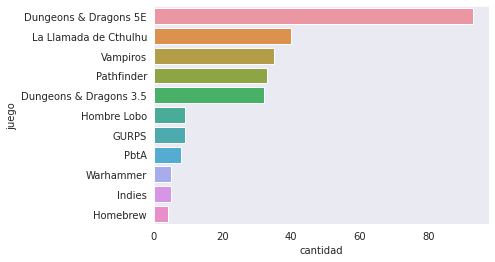

In [32]:
ax = sns.barplot(x='cantidad', y='juego', data=datos)

In [33]:
total = len(otra_vez)
datos['porcentaje'] = ((datos['cantidad']*100)/total)
datos

,juego,cantidad,porcentaje
0,Dungeons & Dragons 5E,93,25.619835
1,La Llamada de Cthulhu,40,11.019284
2,Vampiros,35,9.641873
3,Pathfinder,33,9.090909
4,Dungeons & Dragons 3.5,32,8.815427
5,Hombre Lobo,9,2.479339
6,GURPS,9,2.479339
7,PbtA,8,2.203857
8,Warhammer,5,1.377410
9,Indies,5,1.377410


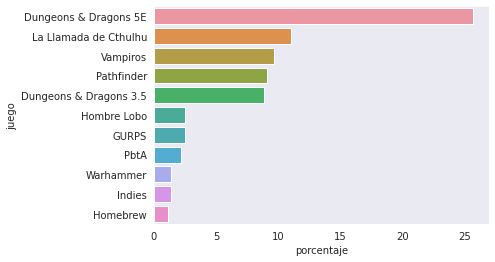

In [34]:
ax = sns.barplot(x='porcentaje', y='juego', data=datos)

In [35]:
#Falta hacerlo por género

##Cis/Trans

In [36]:
df1.head()

,edad,juegos,rol,genero,cistrans,sexualidad,discriminacion_personal,disciminacion_otre,reaccion,grupo,nacimiento,residencia
0,29.0,Dungeons & Dragons 5E,Jugador,Mujer,Cis,Heterosexual,No estoy segurx,No estoy segurx,Sí,Mayoría de varones,Argentina,Argentina
1,29.0,Dungeons & Dragons 5E,Jugadorx,Mujer,Cis,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina
2,32.0,"Dungeons & Dragons 5E, Dungeons & Dragons 3.5",Ambos,Varón,Cis,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina
3,32.0,"Dungeons & Dragons 3.5, Homebrew",Jugadorx,Varón,Cis,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina
4,30.0,"Dungeons & Dragons 5E, Dungeons & Dragons 3.5,...",Ambos,Varón,NaN,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina


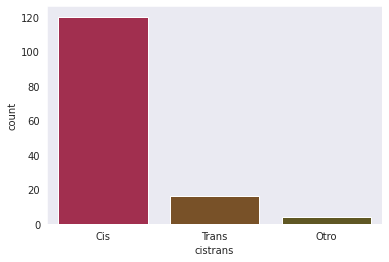

In [37]:
sns.countplot(x="cistrans", data=df1, palette=sns.husl_palette(10, l=.4))

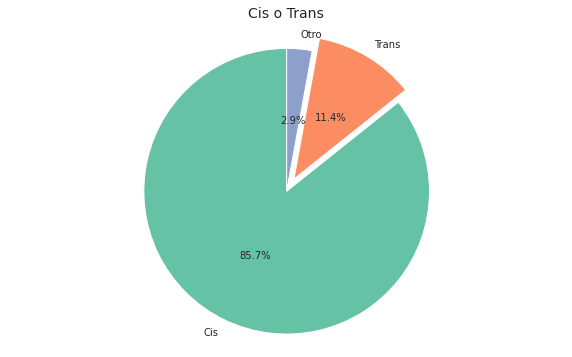

In [38]:
#datos = df1['cistrans']
pie_plot(df1['cistrans'],[0,.1,0], 'Cis o Trans')

##Sexualidad

In [39]:
palette = sns.color_palette("rocket")

In [40]:
df1['sexualidad'].value_counts()

Heterosexual    78
Bisexual        40
Homosexual      11
Pansexual        7
Asexual          6
Otro             4
Name: sexualidad, dtype: int64

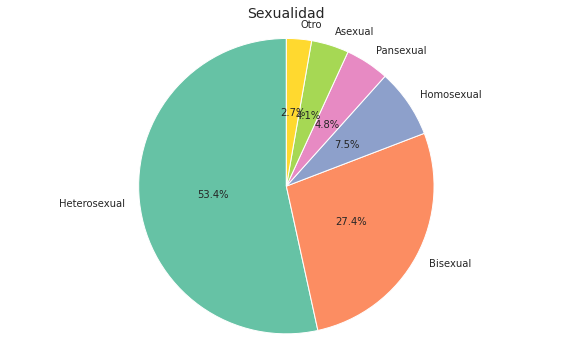

In [41]:
pie_plot(df1['sexualidad'], np.zeros(6), 'Sexualidad')

##Discriminación

In [42]:
df1.head()

,edad,juegos,rol,genero,cistrans,sexualidad,discriminacion_personal,disciminacion_otre,reaccion,grupo,nacimiento,residencia
0,29.0,Dungeons & Dragons 5E,Jugador,Mujer,Cis,Heterosexual,No estoy segurx,No estoy segurx,Sí,Mayoría de varones,Argentina,Argentina
1,29.0,Dungeons & Dragons 5E,Jugadorx,Mujer,Cis,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina
2,32.0,"Dungeons & Dragons 5E, Dungeons & Dragons 3.5",Ambos,Varón,Cis,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina
3,32.0,"Dungeons & Dragons 3.5, Homebrew",Jugadorx,Varón,Cis,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina
4,30.0,"Dungeons & Dragons 5E, Dungeons & Dragons 3.5,...",Ambos,Varón,NaN,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina


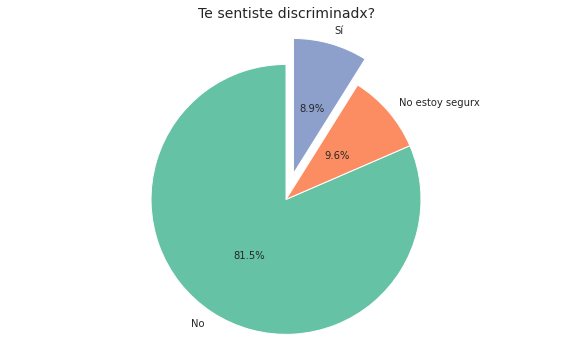

In [43]:
pie_plot(df1['discriminacion_personal'], [0,0,.2], 'Te sentiste discriminadx?')

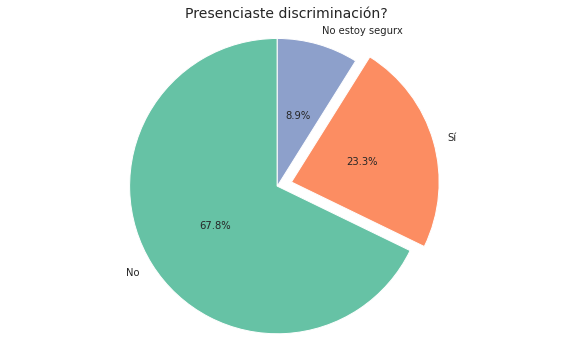

In [44]:
pie_plot(df1['disciminacion_otre'], [0,.1,0], 'Presenciaste discriminación?')

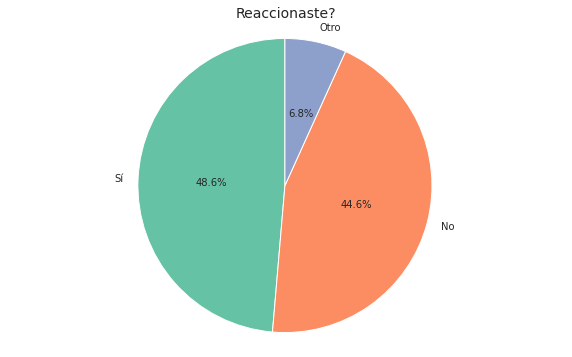

In [45]:
pie_plot(df1['reaccion'], np.zeros(3), 'Reaccionaste?')
#df1.reaccion.str.get_dummies().sum().plot.pie(label='Reaccionaste?', autopct='%1.0f%%')

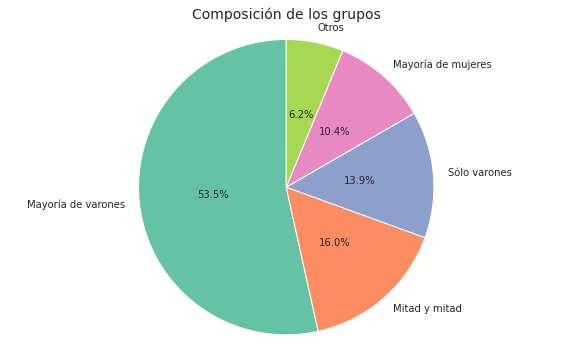

In [53]:
pie_plot(df1['grupo'], np.zeros(5), 'Composición de los grupos')

##Paises

In [100]:
# import the library
import folium

# Make an empty map
m = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2)

# Show the map
#m

In [101]:
paises_cuenta = (df1['residencia'].value_counts()[:].to_list())


In [102]:
paises = (df1['residencia'].value_counts().index.to_list())
paises

['Argentina',
 'España',
 'Perú',
 'México',
 'Chile',
 'Panamá',
 'Reino Unido',
 'Estados Unidos',
 'Francia']

In [103]:
#lat = [-34.9,39.6,-10.3,23.8, -26.5, 8.6, 55.1, 39.7, 46.7]
#lon = [-65.5, -3.3,-75.4,-102.7, -71.1, -80.0, -2.9, -100.6, 1.8]
#paises = ['Argentina', 'España', 'Perú', 'México', 'Chile','Panamá','Reino Unido','Estados Unidos', 'Francia']

mapa = pd.DataFrame({'lat':[-34.9,39.6,-10.3,23.8, -26.5, 8.6, 55.1, 39.7, 46.7],
                     'lon': [-65.5, -3.3,-75.4,-102.7, -71.1, -80.0, -2.9, -100.6, 1.8],
                     'paises': paises, 
                     #['Argentina', 'España', 'Perú', 'México', 'Chile','Panamá','Reino Unido','Estados Unidos', 'Francia'],
                     'cant': [116,50,40,40,40,20,20,20,20]})

mapa

,lat,lon,paises,cant
0,-34.9,-65.5,Argentina,116
1,39.6,-3.3,España,50
2,-10.3,-75.4,Perú,40
3,23.8,-102.7,México,40
4,-26.5,-71.1,Chile,40
5,8.6,-80.0,Panamá,20
6,55.1,-2.9,Reino Unido,20
7,39.7,-100.6,Estados Unidos,20
8,46.7,1.8,Francia,20


In [105]:
# add marker one by one on the map
for i in range(0,len(mapa)):
   folium.Circle(
      location=[mapa.iloc[i]['lat'], mapa.iloc[i]['lon']],
      popup=mapa.iloc[i]['paises'],
      radius=float(mapa.iloc[i]['cant']*10000),
      color='#900C3F ',
      fill=True,
      fill_color='#900C3F '
   ).add_to(m)

# Show the map again
m

##Word Cloud

In [47]:
comentarios = df['comentario'].dropna().to_list()
#comentarios

In [48]:
frases = ' '.join(comentarios)
#frases

In [49]:
palabras = [palabra.strip(string.punctuation) for palabra in frases.split()]

In [50]:
contador_palabras=Counter(palabras)
palabras_ordenadas = sorted(contador_palabras.items(), key=lambda x: x[1], reverse=True)

#for i in palabras_ordenadas:
#	print(i[0], i[1])

In [51]:
pal= ['adolescente', 'segregado','hetero','chicas','partidas','sexo','rol',
      'mesas', 'discriminación', 'personaje', 'juego', 'experiencia', 'amigos', 
      'personas','mujeres', 'grupos', 'sexual', 'varones', 'cis', 'queer', 
      'rolear','ignorancia','sexo','vida','personas','mesa', 'mujer', 'hombres',
      'mundo', 'varones','jugar','orientación', 'pregunta', 'género', 'confianza', 
      'inclusivo', 'alguien','confianza', 'Creo', 'sé', 'uso','interpretar',
      'distinto', 'medio','parte','falta','grupo','gente','mesa']

palabras_filtradas = {}
for key, value in contador_palabras.items():
    if (key in pal):

        palabras_filtradas[key] = value

#print(palabras_filtradas)

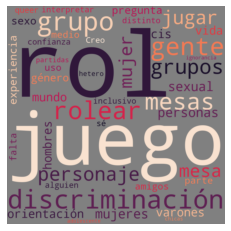

In [109]:
nube_palabras = WordCloud(width = 1000, height = 1000, colormap='rocket',
                          background_color="grey").generate_from_frequencies(palabras_filtradas)
# Display the generated image:
plt.imshow(nube_palabras, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()